<a href="https://colab.research.google.com/github/cristinarainich/Child-Mind-Institute-Project/blob/main/Pheno_data_finalquery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Updated** 23/09/2024

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import math
import pylab as pl
import seaborn as sns
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
sns.set()

In [4]:
working_path = Path('/content/drive/MyDrive/KKNV')

In [5]:
cd /content/drive/MyDrive/KKNV

/content/drive/MyDrive/KKNV


In [6]:
!ls /content/drive/MyDrive/KKNV

 11a5490b-0e2d-4fd7-b54e-e2ebd0a72df6.zip   Pilot.csv
 comorbidity				   'Pilot reading task.gsheet'
 data					    protocols
 data26.02.2024.csv			    Query1.csv
 data_filtered_done.csv			   'Query 1.Dot values.csv'
'files sharing.docx'			    Query2.csv
 ids.csv				   'Query 2.Dot values.csv'
 iq_overview.csv			    Query_final.csv
 iq_overview.gsheet			    query_September2024.csv
 old					    sites.csv
 Pheno.csv				    tasks
 pheno_mri.csv				    Temporal_Frequency_Staircase_V3_gamified_L2R_Ilia.eve


## Pipeline to make the data convinient to use

Here we are going to use the full and the most recent dataset.

In [7]:
# our dataset
data = pd.read_csv(
    working_path.joinpath('query_September2024.csv'),
    index_col=None,
    low_memory=False
)

In [8]:
data.shape

(6687, 791)

In [9]:
ids = data.Identifiers.values
new_ids = []
for i in ids:
  new_i = i.replace(',assessment', '')
  new_ids.append(new_i)
print(len(ids))
print(len(new_ids))

data['Identifiers'] = new_ids

6687
6687


In [10]:
data = data.drop(labels=0, axis=0)

In [11]:
data.head()

,Identifiers,"Barratt,Barratt_P1_Edu","Barratt,Barratt_P1_Occ","Barratt,Barratt_P2_Edu","Barratt,Barratt_P2_Occ","Barratt,Barratt_Total","Barratt,Barratt_Total_Edu","Barratt,Barratt_Total_Occ","Barratt,financialsupport","Basic_Demos,Age",...,"WISC_Remote,WISC_VCI_Sum","WISC_Remote,WISC_VP_Raw","WISC_Remote,WISC_VP_Scaled","WISC_Remote,WISC_Vocab_Raw","WISC_Remote,WISC_Vocab_Scaled","WISC_Remote,WISC_WMI","WISC_Remote,WISC_WMI_Percentile","WISC_Remote,WISC_WMI_Sum","WISC_Remote,WISC_complete","WISC_Remote,WISC_incomplete_reason"
1,NDARAA075AMK,21,30,21,45,58.5,21,37.5,3,6.72804,...,.,.,.,.,.,.,.,.,.,.
2,NDARAA112DMH,18,30,12,15,37.5,15,22.5,3,5.545744,...,.,.,.,.,.,.,.,.,.,.
3,NDARAA117NEJ,12,5,3,5,12.5,7.5,5,3,7.475929,...,.,.,.,.,.,.,.,.,.,.
4,NDARAA306NT2,21,15,15,15,33,18,15,3,21.216746,...,.,.,.,.,.,.,.,.,.,.
5,NDARAA504CRN,21,40,NaN,NaN,61,21,40,1,9.165297,...,.,.,.,.,.,.,.,.,.,.


The Identifiers at the end of the table contain additional visits of some of the subjects. We need to incorporate this information to the original data entries. The snap of the code below is an example of this occuring in the data.

In [12]:
data['Identifiers'].values[6000:6200]

array(['NDARPX155RF3_Visit_2', 'NDARPX155RF3_Visit_3',
       'NDARPX219TW0_Visit_1', 'NDARPX219TW0_Visit_2',
       'NDARPX219TW0_Visit_3', 'NDARPZ621ZLE_Visit_3',
       'NDARRA717GYV_Visit_1', 'NDARRA717GYV_Visit_2',
       'NDARRA733VWX_Visit_1', 'NDARRA733VWX_Visit_2',
       'NDARRA733VWX_Visit_3', 'NDARRA733VWX_Visit_4',
       'NDARRB942UWU_Visit_1', 'NDARRB942UWU_Visit_2',
       'NDARRB942UWU_Visit_3', 'NDARRC190NKB_Visit_1',
       'NDARRC190NKB_Visit_2', 'NDARRC190NKB_Visit_3',
       'NDARRC819NLC_Visit_1', 'NDARRC819NLC_Visit_2',
       'NDARRC819NLC_Visit_3', 'NDARRD326KB9_Visit_1',
       'NDARRD326KB9_Visit_2', 'NDARRD326KB9_Visit_3',
       'NDARRD720XZK_Visit_1', 'NDARRD720XZK_Visit_2',
       'NDARRD720XZK_Visit_3', 'NDARRF897HB5_Visit_1',
       'NDARRF897HB5_Visit_2', 'NDARRF897HB5_Visit_3',
       'NDARRG199RU4_Visit_2', 'NDARRG199RU4_Visit_3',
       'NDARRG415BJM_Visit_1', 'NDARRG415BJM_Visit_2',
       'NDARRG415BJM_Visit_3', 'NDARRH407MEY_Visit_1',
       'ND

In [13]:
versions = []
for i in data.Identifiers.values.tolist():
  if '_' in i:
    versions.append(i)
print(len(versions))

1819


In [14]:
columns = data.columns
i = 0
for id in versions:
  values = data[data['Identifiers'] == id].values.tolist()
  while len(values) == 1:
    values = values[0]
  for value in values[1:]:
    if value != '.':
      if type(value) == str:
        column_number = values.index(value)
        row_number = data[data['Identifiers'] == id[:12]].index[0]
        data.at[row_number, columns[column_number]] = value
      elif type(value) != str and math.isnan(value) is not True:
        column_number = values.index(value)
        row_number = data[data['Identifiers'] == id[:12]].index[0]
        data.at[row_number, columns[column_number]] = value
      else:
        if math.isnan(value) is not True:
          print(value, type(value))
  i += 1
print(i)

1819


In [15]:
for id in versions:
  data = data[data['Identifiers'] != id]
data.shape

(4867, 791)

In [16]:
# checking for duplicates
num_col_duplicates = data['Identifiers'].duplicated().sum()
print(f'Number of duplicates in column "Identifiers": {num_col_duplicates}')

Number of duplicates in column "Identifiers": 0


In [17]:
# we also have a column Basic Demos, EID that contain identifiers. Let's cross reference to check whether there are any discrepancies
ids1 = data['Identifiers'].values
ids2 = data['Basic_Demos,EID'].values
print(len(ids1))
print(len(ids2))
for i in range(0, len(ids1)):
  if ids1[i] != ids2[i]:
    print(ids1, ids2)
    break

4867
4867


In [18]:
data.columns

Index(['Identifiers', 'Barratt,Barratt_P1_Edu', 'Barratt,Barratt_P1_Occ',
       'Barratt,Barratt_P2_Edu', 'Barratt,Barratt_P2_Occ',
       'Barratt,Barratt_Total', 'Barratt,Barratt_Total_Edu',
       'Barratt,Barratt_Total_Occ', 'Barratt,financialsupport',
       'Basic_Demos,Age',
       ...
       'WISC_Remote,WISC_VCI_Sum', 'WISC_Remote,WISC_VP_Raw',
       'WISC_Remote,WISC_VP_Scaled', 'WISC_Remote,WISC_Vocab_Raw',
       'WISC_Remote,WISC_Vocab_Scaled', 'WISC_Remote,WISC_WMI',
       'WISC_Remote,WISC_WMI_Percentile', 'WISC_Remote,WISC_WMI_Sum',
       'WISC_Remote,WISC_complete', 'WISC_Remote,WISC_incomplete_reason'],
      dtype='object', length=791)

Let's now work on individual columns to make them more convinient for screening

In [19]:
# we have a column "Participant Status" that contains information on whether
# a person dropped out or been lost to follow up
status = data['Basic_Demos,Participant_Status'].unique()
for each in status:
  number = data[data['Basic_Demos,Participant_Status'] == each].shape[0]
  print('Number of ' + each + ': ' + str(number))

Number of Complete: 4241
Number of Lost to follow-up: 269
Number of Dropout: 357


In [20]:
#working on Basic_Demos columns
data['Basic_Demos,Age'] = data['Basic_Demos,Age'].astype(float)
data['Basic_Demos,Sex'] = data['Basic_Demos,Sex'].astype(int)
data.drop(['Basic_Demos,Site'], axis=1, inplace = True) # contain only nan values
data['Basic_Demos,Study_Site'] = data['Basic_Demos,Study_Site'].astype(int)

In [21]:
# Barrat score
number = data[data['Barratt,Barratt_Total'] == '.'].shape[0]
print('Missing values for Barrat scores: ' + str(number) + ' out of ' + str(data.shape[0]))

Missing values for Barrat scores: 434 out of 4867


In [22]:
# CELF tests
# if we end up using it, it might make sense to check the validity first in CELF_Valid
data['CELF,CELF_Total'] = data['CELF,CELF_Total'].fillna('.')
number = data[data['CELF,CELF_Total'] == '.'].shape[0]
print('Missing values for CELF scores: ' + str(number) + ' out of ' + str(data.shape[0]))

Missing values for CELF scores: 662 out of 4867


In [23]:
# CTOPP-2
# don't trust the 'complete' field, the ones with number 2 are both who completed some sets and who did nothing
data['CTOPP,CTOPP_Complete'] = data['CTOPP,CTOPP_Complete'].fillna('.')
number = data[data['CTOPP,CTOPP_Complete'] != '1'].shape[0]
print('Missing values for CTOPP-2 scores: ' + str(number) + ' out of ' + str(data.shape[0]))

names = ['CTOPP,CTOPP_BW_D', 'CTOPP,CTOPP_BW_P',
       'CTOPP,CTOPP_BW_R', 'CTOPP,CTOPP_BW_S',
       'CTOPP,CTOPP_EL_D', 'CTOPP,CTOPP_EL_P', 'CTOPP,CTOPP_EL_R',
       'CTOPP,CTOPP_EL_S', 'CTOPP,CTOPP_NR_D', 'CTOPP,CTOPP_NR_P',
       'CTOPP,CTOPP_NR_R', 'CTOPP,CTOPP_NR_S', 'CTOPP,CTOPP_RD_D',
       'CTOPP,CTOPP_RD_P', 'CTOPP,CTOPP_RD_R', 'CTOPP,CTOPP_RD_S',
       'CTOPP,CTOPP_RL_D', 'CTOPP,CTOPP_RL_P', 'CTOPP,CTOPP_RL_R',
       'CTOPP,CTOPP_RL_S', 'CTOPP,CTOPP_RO_D', 'CTOPP,CTOPP_RO_P',
       'CTOPP,CTOPP_RO_R', 'CTOPP,CTOPP_RO_S', 'CTOPP,CTOPP_RSN_Comp',
       'CTOPP,CTOPP_RSN_D', 'CTOPP,CTOPP_RSN_P', 'CTOPP,CTOPP_RSN_Sum']

for name in names:
  data[name] = data[name].fillna('.') # filling nan values if any

ctopp = []
ids = data.Identifiers.values.tolist()
for id in ids:
  subset = data[data['Identifiers'] == id]
  tests = []
  for name in names:
    if subset[name].values[0] != '.':
      tests.append(name)
  if len(tests) == 28:
    ctopp.append('full')
  elif len(tests) == 0:
    ctopp.append('missing')
  else:
    new_tests = ''
    for each in tests:
      new_tests = new_tests + each[12:] + ', '
    ctopp.append(new_tests)
data['CTOPP'] = ctopp

Missing values for CTOPP-2 scores: 805 out of 4867


In [24]:
# DailyMeds
# we have people who have taken medication, drugs, or alcohol

print('Drugs: ', data['DailyMeds,drugs'].unique()) # value '.' and 2 contains only nan values and '.'
#data[data['DailyMeds,drugs'] == '1'][['DailyMeds,drugs_01', 'DailyMeds,drugs_02']] # to check the drugs

print('Alcohol: ', data['DailyMeds,alcohol'].unique()) # value '.' and 2 contains only nan values and '.'
#data[data['DailyMeds,alcohol'] == '1'][['DailyMeds,alc_01', 'DailyMeds,alc_02']] # to check alcohol (only one person)

print('Meds: ', data['DailyMeds,medications'].unique()) # DO NOT TRUST THE SCORES, only look at the names and doses

data['DailyMeds,med_name_01'] = data['DailyMeds,med_name_01'].fillna('.') # have ' ', nan, and '.' values
data['DailyMeds,med_name_02'] = data['DailyMeds,med_name_02'].fillna('.') # have '.' and nan values
data['DailyMeds,med_name_03'] = data['DailyMeds,med_name_03'].fillna('.') # have '.' and nan values

meds1 = data['DailyMeds,med_name_01'].values.tolist() # have ' ' and '.' values
meds2 = data['DailyMeds,med_name_02'].values.tolist() # have '.' values
meds3 = data['DailyMeds,med_name_03'].values.tolist() # have '.' values
medications = []
for i in range(0, data.shape[0]):
  status = 0
  if meds1[i] != '.':
    if meds1[i] != ' ':
      status += 1
    elif meds1[i] == ' ':
      status = 0
  elif meds1[i] == '.':
    if meds2[i] != '.':
      status += 1
    elif meds2[i] == '.':
      if meds3[i] != '.':
        status += 1
  if status != 0:
    medications.append(1)
  else:
    medications.append(0)

data['DailyMeds,medications'] = medications # created a new coding depending on whether there are any entries in drug names

Drugs:  ['2' '.' '0' '1']
Alcohol:  ['2' '.' '0' '1']
Meds:  ['1' '.' '0']


In [42]:
# Diagnosis_ClinicianConsensus
data['Diagnosis_ClinicianConsensus,NoDX'] = data['Diagnosis_ClinicianConsensus,NoDX'].fillna('.')
data['Diagnosis_ClinicianConsensus,DX_01'] = data['Diagnosis_ClinicianConsensus,DX_01'].fillna('.') # have ' ' and '.'
data['Diagnosis_ClinicianConsensus,DX_02'] = data['Diagnosis_ClinicianConsensus,DX_02'].fillna('.') # have nan, '.', and ' '
data['Diagnosis_ClinicianConsensus,DX_03'] = data['Diagnosis_ClinicianConsensus,DX_03'].fillna('.') # have nan, '.', and ' '
data['Diagnosis_ClinicianConsensus,DX_04'] = data['Diagnosis_ClinicianConsensus,DX_04'].fillna('.') # have nan, '.', and ' '
data['Diagnosis_ClinicianConsensus,DX_05'] = data['Diagnosis_ClinicianConsensus,DX_05'].fillna('.') # have nan, and '.'
data['Diagnosis_ClinicianConsensus,DX_06'] = data['Diagnosis_ClinicianConsensus,DX_06'].fillna('.') # have nan, and '.'
data['Diagnosis_ClinicianConsensus,DX_07'] = data['Diagnosis_ClinicianConsensus,DX_07'].fillna('.') # have nan, and '.'
data['Diagnosis_ClinicianConsensus,DX_08'] = data['Diagnosis_ClinicianConsensus,DX_08'].fillna('.') # have nan, and '.'
data['Diagnosis_ClinicianConsensus,DX_09'] = data['Diagnosis_ClinicianConsensus,DX_09'].fillna('.') # have nan, and '.'
data['Diagnosis_ClinicianConsensus,DX_10'] = data['Diagnosis_ClinicianConsensus,DX_10'].fillna('.') # have nan, and '.'

# DX_01: have 5 ' ' entries - 2 of those contain diagnosis in other fields, 101 '.' entries, 373 No Diagnosis Given, 526 No Diagnosis Given: Incomplete Eval
# All the people who dropped out of the study, do have a status 'No Diagnosis Given: Incomplete Eval' - 526 people
print('The values for whether the diagnosis is given or not:', data['Diagnosis_ClinicianConsensus,NoDX'].unique()) # 1 No Diagnosis Given (Control), 2 Yes, 3 Dropped out of the study, '.' remaining a mystery
data[data['Diagnosis_ClinicianConsensus,NoDX'] == '3'].groupby(['Diagnosis_ClinicianConsensus,DX_01'])['Identifiers'].count() # we will exclude them in the exclusion section

The values for whether the diagnosis is given or not: ['1' '2' '.' '3']


,Identifiers
"Diagnosis_ClinicianConsensus,DX_01",
No Diagnosis Given: Incomplete Eval,526


We need to identify who is control and who is dyslexic and who has nothing to do with these categories. Control participants have the status of 'No Diagnosis Given' in the DX_01 and in the NoDX (the indicator 1). We need to push together the diagnoses from all of the 10 columns, consider the degree of certainty for these diagnosis and whether it is a confirmed status or not, and then create the column with values stating what group a particular participant is attributed to. As a result, I would like to have a status column saying that it is a drop out, control, just dyslexic, dyslexic with comorbidities or orther disorder. And then I would like to have a separate column that would include all the list of diagnoses for people who are not drop outs and controls.

In [51]:
data['Diagnosis_ClinicianConsensus,DX_01'].unique()

array(['No Diagnosis Given', 'ADHD-Combined Type',
       'Generalized Anxiety Disorder', 'ADHD-Inattentive Type',
       'Specific Learning Disorder with Impairment in Reading',
       'Other Specified Depressive Disorder',
       'Other Specified Attention-Deficit/Hyperactivity Disorder',
       'Disruptive Mood Dysregulation Disorder',
       'Oppositional Defiant Disorder', 'Major Depressive Disorder',
       'Tourettes Disorder', 'Other Specified Anxiety Disorder',
       'Speech Sound Disorder', 'Autism Spectrum Disorder', '.',
       'No Diagnosis Given: Incomplete Eval', 'Language Disorder',
       'Social Anxiety (Social Phobia)',
       'Specific Learning Disorder with Impairment in Mathematics',
       'Separation Anxiety', 'Social (Pragmatic) Communication Disorder',
       'Provisional Tic Disorder', 'Specific Phobia',
       'Borderline Intellectual Functioning',
       'ADHD-Hyperactive/Impulsive Type',
       'Gender Dysphoria in Adolescents and Adults',
       'Intelle

In [ ]:
 # Diagnosis_ClinicianConsensus
def diagnosis(df):
  df['Diagnosis_ClinicianConsensus,NoDX'] = df['Diagnosis_ClinicianConsensus,NoDX'].fillna('.')

  status = [] # will contain information on whether it is control, dropout, DD with/without comorbidities, other
  all_diagnoses = [] # will contain all the diagnoses

  for i in range(0, df.shape[0]): # going through all the data
    subset = df.iloc[i] # a particular raw will all the values
    noDX = subset['Diagnosis_ClinicianConsensus,NoDX'] # 3 - drop out; 1 - control; 2, ' ', '.' - some diagnosis
    if noDX == '3': # drop out
      status.append('Dropout')
      all_diagnoses.append('N/A')
    elif noDX == '1': # No Diagnosis Given
      status.append('Control')
      all_diagnoses.append('N/A')
    else: # when noDX = 2, '.', or ' ' it has a diagnosis
      # here we are going to consider all the columns that contain the name of diagnosis
      for number in range(0, 11): # we are going one by one through all the diagnosis columns
        inter_diag = []
        if number != 10: #ADD IF == 10 LATER
          name_diag = 'Diagnosis_ClinicianConsensus,DX_0' + str(number)
          name_conf = 'Diagnosis_ClinicianConsensus,DX_0' + str(number) + '_Confirmed'
          all_names = []
          for each in all_names:
            subset[each] = subset[each].fillna('.') # getting rid of na values in all the necessary columns

          diagnosis = subset[name_diag]
          if 'No Diagnosis' in diagnosis: # when something is off and no diagnosis detected outside of the noDX values 1 and 3
            print('ERROR: No Diagnosis detected')
            print('The raw: ', i, ' ', name_diag, diagnosis)
            break
          # now we should cover all the cases with the type of diagnosis
          elif diagnosis == '.':

          elif diagnosis == ' ':

          else:
            # dont forget to check wheteher they have dyslexia



          diagnosis = df[name_diag].values # will take the values from a particular diagnosis column
          confirmed = .... # will take the degree of certainty for this diagnosis






        diagnosis[i] # a particualr i


















    else:
      name_diag = 'Diagnosis_ClinicianConsensus,DX_10'
      name_conf


  for i in range(0, df.shape[0]):
    # if it's '.', ' ' value or incomplete eval
    if diagnosis[i] == '.' or diagnosis[i] == ' ':
      dyslexia.append('.')
      new_diagnosis.append('.')
    elif  'Incomplete' in diagnosis[i]:
      dyslexia.append('Incomplete')
      new_diagnosis.append('Incomplete')
    # if it is no diagnisis given
    elif diagnosis[i] == 'No Diagnosis Given':
      dyslexia.append('Control')
      new_diagnosis.append('Control')
    # if it's SLD
    elif 'Specific Learning Disorder with' in diagnosis[i]:
      if confirmed[i] != '0':
        dyslexia.append('dys')
        new_diagnosis.append(diagnosis[i])
      elif confirmed[i] == '0':
        dyslexia.append(0)
        new_diagnosis.append(0)
    # if some other diagnosis
    else:
      if confirmed[i] != '0':
        dyslexia.append(0)
        new_diagnosis.append(diagnosis[i])
      elif confirmed[i] == '0':
        dyslexia.append(0)
        new_diagnosis.append(0)

  return dyslexia, new_diagnosis




In [ ]:
# work on Diagnosis column
# looks like a dot could be no diagnosis as it seems to be consistent across the columns
# there are also nan values in confirmed column
# throw away this 'No Diagnosis Given: Incomplete Eval'
# give 0 to these 'No Diagnosis Given'
def diagnosis(df, number):
  name_diag = 'Diagnosis_ClinicianConsensus,DX_0' + str(number)
  name_conf = 'Diagnosis_ClinicianConsensus,DX_0' + str(number) + '_Confirmed'
  diagnosis = df[name_diag].values
  confirmed = df[name_conf].values

  dyslexia = []
  new_diagnosis = []

  for i in range(0, df.shape[0]):
    # if it's '.', ' ' value or incomplete eval
    if diagnosis[i] == '.' or diagnosis[i] == ' ':
      dyslexia.append('.')
      new_diagnosis.append('.')
    elif  'Incomplete' in diagnosis[i]:
      dyslexia.append('Incomplete')
      new_diagnosis.append('Incomplete')
    # if it is no diagnisis given
    elif diagnosis[i] == 'No Diagnosis Given':
      dyslexia.append('Control')
      new_diagnosis.append('Control')
    # if it's SLD
    elif 'Specific Learning Disorder with' in diagnosis[i]:
      if confirmed[i] != '0':
        dyslexia.append('dys')
        new_diagnosis.append(diagnosis[i])
      elif confirmed[i] == '0':
        dyslexia.append(0)
        new_diagnosis.append(0)
    # if some other diagnosis
    else:
      if confirmed[i] != '0':
        dyslexia.append(0)
        new_diagnosis.append(diagnosis[i])
      elif confirmed[i] == '0':
        dyslexia.append(0)
        new_diagnosis.append(0)

  return dyslexia, new_diagnosis
# for all data
all_diagnosis = {}
all_dys = {}
for i in range(1, 10):
  dyslexia, new_diagnosis = diagnosis(data, i)
  all_dys['diag_%s' % i] = dyslexia
  all_diagnosis['diag_%s' % i] = new_diagnosis

dys_status = []
for i in range(0, data.shape[0]):
  participant = []
  for sublist in all_dys:
    subset = all_dys[sublist][i]
    participant.append(subset)

  if 'Incomplete' in participant:
    dys_status.append('Incomplete')
  elif 'Control' in participant:
    dys_status.append(0)
  elif 'dys' in participant:
    dys_status.append(1)
  else:
    dys_status.append(0)

all_status = []
for i in range(0, data.shape[0]):
  participant = []
  add = []
  for sublist in all_diagnosis:
    subset = all_diagnosis[sublist][i]
    participant.append(subset)

  if 'Incomplete' in participant:
    all_status.append('Incomplete')
  elif 'Control' in participant:
    all_status.append(0)
  else:
    for each in participant:
      if each != '.' and each != 0:
        add.append(each)
    if len(add) == 0:
      if (i == '.' for i in participant):
        all_status.append('.')
      else:
        print(participant)
        print(add)
        break
    elif len(add) == 1:
      all_status.append(add[0])
    else:
      all_status.append(add)

data['DD'] = dys_status
data['Diagnosis'] = all_status

for i in range(1,10):
  name_diag = 'Diagnosis_ClinicianConsensus,DX_0' + str(i)
  name_conf = 'Diagnosis_ClinicianConsensus,DX_0' + str(i) + '_Confirmed'
  name_code = 'Diagnosis_ClinicianConsensus,DX_0' + str(i) + '_Code'
  data.drop([name_diag], axis=1, inplace=True)
  data.drop([name_conf], axis=1, inplace=True)
  data.drop([name_code], axis=1, inplace=True)
data.drop(['Diagnosis_ClinicianConsensus,DX_10'], axis=1, inplace=True)
data.drop(['Diagnosis_ClinicianConsensus,DX_10_Code'], axis=1, inplace=True)
data.drop(['Diagnosis_ClinicianConsensus,DX_10_Confirmed'], axis=1, inplace=True)

In [40]:
data[['Diagnosis_ClinicianConsensus,DX_01', 'Diagnosis_ClinicianConsensus,DX_01_ByHx',
       'Diagnosis_ClinicianConsensus,DX_01_Cat',
       'Diagnosis_ClinicianConsensus,DX_01_Code',
       'Diagnosis_ClinicianConsensus,DX_01_Confirmed',
       'Diagnosis_ClinicianConsensus,DX_01_New',
       'Diagnosis_ClinicianConsensus,DX_01_PRem',
       'Diagnosis_ClinicianConsensus,DX_01_Past_Doc',
       'Diagnosis_ClinicianConsensus,DX_01_Presum',
       'Diagnosis_ClinicianConsensus,DX_01_RC',
       'Diagnosis_ClinicianConsensus,DX_01_Rem',
       'Diagnosis_ClinicianConsensus,DX_01_RuleOut',
       'Diagnosis_ClinicianConsensus,DX_01_Spec',
       'Diagnosis_ClinicianConsensus,DX_01_Sub',
       'Diagnosis_ClinicianConsensus,DX_01_Time']]

,"Diagnosis_ClinicianConsensus,DX_01","Diagnosis_ClinicianConsensus,DX_01_ByHx","Diagnosis_ClinicianConsensus,DX_01_Cat","Diagnosis_ClinicianConsensus,DX_01_Code","Diagnosis_ClinicianConsensus,DX_01_Confirmed","Diagnosis_ClinicianConsensus,DX_01_New","Diagnosis_ClinicianConsensus,DX_01_PRem","Diagnosis_ClinicianConsensus,DX_01_Past_Doc","Diagnosis_ClinicianConsensus,DX_01_Presum","Diagnosis_ClinicianConsensus,DX_01_RC","Diagnosis_ClinicianConsensus,DX_01_Rem","Diagnosis_ClinicianConsensus,DX_01_RuleOut","Diagnosis_ClinicianConsensus,DX_01_Spec","Diagnosis_ClinicianConsensus,DX_01_Sub","Diagnosis_ClinicianConsensus,DX_01_Time"
1,No Diagnosis Given,0,No Diagnosis Given,No Diagnosis Given,NaN,0,0,NaN,NaN,0,0,0,NaN,NaN,1
2,ADHD-Combined Type,0,Neurodevelopmental Disorders,F90.2,NaN,0,0,NaN,NaN,0,0,0,NaN,Attention-Deficit/Hyperactivity Disorder,1
3,ADHD-Combined Type,0,Neurodevelopmental Disorders,F90.2,NaN,1,0,NaN,NaN,0,0,0,NaN,Attention-Deficit/Hyperactivity Disorder,1
4,Generalized Anxiety Disorder,0,Anxiety Disorders,NaN,1,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,1
5,ADHD-Inattentive Type,0,Neurodevelopmental Disorders,F90.0,1,NaN,NaN,NaN,0,0,NaN,0,NaN,Attention-Deficit/Hyperactivity Disorder,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4863,No Diagnosis Given: Incomplete Eval,0,No Diagnosis Given: Incomplete Eval,No Diagnosis Given: Incomplete Eval,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,1
4864,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
4865,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
4866,No Diagnosis Given: Incomplete Eval,NaN,No Diagnosis Given: Incomplete Eval,No Diagnosis Given: Incomplete Eval,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,1


In [30]:
data['Diagnosis_ClinicianConsensus,NoDX'].unique() # 1 No, 2 Yes, 3 Dropped out of the study

array(['1', '2', '.', '3'], dtype=object)

In [36]:
data[data['Diagnosis_ClinicianConsensus,NoDX'] == '.'].groupby([
    'Diagnosis_ClinicianConsensus,DX_01'])['Identifiers'].count()

,Identifiers
"Diagnosis_ClinicianConsensus,DX_01",
,2
.,101


In [37]:
data[data['Diagnosis_ClinicianConsensus,DX_01'] == ' '][[
    'Diagnosis_ClinicianConsensus,DX_01', 'Diagnosis_ClinicianConsensus,DX_02',
    'Diagnosis_ClinicianConsensus,DX_03', 'Diagnosis_ClinicianConsensus,DX_04',
    'Diagnosis_ClinicianConsensus,DX_05', 'Diagnosis_ClinicianConsensus,DX_06',
    'Diagnosis_ClinicianConsensus,DX_07', 'Diagnosis_ClinicianConsensus,DX_08',
    'Diagnosis_ClinicianConsensus,DX_09', 'Diagnosis_ClinicianConsensus,DX_10'
]]

,"Diagnosis_ClinicianConsensus,DX_01","Diagnosis_ClinicianConsensus,DX_02","Diagnosis_ClinicianConsensus,DX_03","Diagnosis_ClinicianConsensus,DX_04","Diagnosis_ClinicianConsensus,DX_05","Diagnosis_ClinicianConsensus,DX_06","Diagnosis_ClinicianConsensus,DX_07","Diagnosis_ClinicianConsensus,DX_08","Diagnosis_ClinicianConsensus,DX_09","Diagnosis_ClinicianConsensus,DX_10"
1758,,.,.,.,.,.,.,.,.,.
1860,,ADHD-Combined Type,Oppositional Defiant Disorder,Specific Phobia,Specific Learning Disorder with Impairment in ...,Specific Learning Disorder with Impairment in ...,.,.,.,.
2453,,.,.,.,.,.,.,.,.,.
4096,,.,.,.,.,.,.,.,.,.
4465,,.,.,.,.,.,.,.,.,.


In [ ]:
data.columns[180:250]

Index(['DailyMeds,drugs', 'DailyMeds,drugs_01', 'DailyMeds,drugs_02',
       'DailyMeds,med_dose_01', 'DailyMeds,med_dose_02',
       'DailyMeds,med_dose_03', 'DailyMeds,med_name_01',
       'DailyMeds,med_name_02', 'DailyMeds,med_name_03',
       'DailyMeds,med_type_01', 'DailyMeds,med_type_02',
       'DailyMeds,med_type_03', 'DailyMeds,medications',
       'Diagnosis_ClinicianConsensus,DX_01',
       'Diagnosis_ClinicianConsensus,DX_01_ByHx',
       'Diagnosis_ClinicianConsensus,DX_01_Cat',
       'Diagnosis_ClinicianConsensus,DX_01_Code',
       'Diagnosis_ClinicianConsensus,DX_01_Confirmed',
       'Diagnosis_ClinicianConsensus,DX_01_New',
       'Diagnosis_ClinicianConsensus,DX_01_PRem',
       'Diagnosis_ClinicianConsensus,DX_01_Past_Doc',
       'Diagnosis_ClinicianConsensus,DX_01_Presum',
       'Diagnosis_ClinicianConsensus,DX_01_RC',
       'Diagnosis_ClinicianConsensus,DX_01_Rem',
       'Diagnosis_ClinicianConsensus,DX_01_RuleOut',
       'Diagnosis_ClinicianConsensus,DX_0

In [27]:
data.columns[300:350]

Index(['Diagnosis_ClinicianConsensus,DX_08_Cat',
       'Diagnosis_ClinicianConsensus,DX_08_Code',
       'Diagnosis_ClinicianConsensus,DX_08_Confirmed',
       'Diagnosis_ClinicianConsensus,DX_08_New',
       'Diagnosis_ClinicianConsensus,DX_08_PRem',
       'Diagnosis_ClinicianConsensus,DX_08_Past_Doc',
       'Diagnosis_ClinicianConsensus,DX_08_Presum',
       'Diagnosis_ClinicianConsensus,DX_08_RC',
       'Diagnosis_ClinicianConsensus,DX_08_Rem',
       'Diagnosis_ClinicianConsensus,DX_08_RuleOut',
       'Diagnosis_ClinicianConsensus,DX_08_Spec',
       'Diagnosis_ClinicianConsensus,DX_08_Sub',
       'Diagnosis_ClinicianConsensus,DX_08_Time',
       'Diagnosis_ClinicianConsensus,DX_09',
       'Diagnosis_ClinicianConsensus,DX_09_ByHx',
       'Diagnosis_ClinicianConsensus,DX_09_Cat',
       'Diagnosis_ClinicianConsensus,DX_09_Code',
       'Diagnosis_ClinicianConsensus,DX_09_Confirmed',
       'Diagnosis_ClinicianConsensus,DX_09_New',
       'Diagnosis_ClinicianConsensus,DX_09_P

In [ ]:
for i in range(1,10):
  name_diag = 'Diagnosis_ClinicianConsensus,DX_0' + str(i)
  name_conf = 'Diagnosis_ClinicianConsensus,DX_0' + str(i) + '_Confirmed'
  name_code = 'Diagnosis_ClinicianConsensus,DX_0' + str(i) + '_Code'
  data.drop([name_diag], axis=1, inplace=True)
  data.drop([name_conf], axis=1, inplace=True)
  data.drop([name_code], axis=1, inplace=True)
data.drop(['Diagnosis_ClinicianConsensus,DX_10'], axis=1, inplace=True)
data.drop(['Diagnosis_ClinicianConsensus,DX_10_Code'], axis=1, inplace=True)
data.drop(['Diagnosis_ClinicianConsensus,DX_10_Confirmed'], axis=1, inplace=True)

In [ ]:
print('Control subjects')
print(data[(data['DD'] == 0) & (data['Diagnosis'] == 0)].shape[0])
print('Disorders w/out DD')
print(data[(data['DD'] == 0) & (data['Diagnosis'] != 0)].shape[0])
print('Disorders w DD')
print(data[data['DD'] == 1].shape[0])

Control subjects
373
Disorders w/out DD
3320
Disorders w DD
649


In [ ]:
new_diag = []
new_dtypes = []
diag = data.Diagnosis.values
for i in diag:
  if i == 0:
    new_diag.append(i)
    new_dtypes.append(i)
  # one diagnosis
  elif type(i) == str:
    if 'Specific Learning Disorder with Impairment' in i:
      new_diag.append('SLD')
      if 'Reading' in i:
        new_dtypes.append('Reading')
      elif 'Written' in i:
        new_dtypes.append('Writing')
      elif 'Mathematics' in i:
        new_dtypes.append('Math')
    else:
      new_diag.append(i)
      new_dtypes.append(0)
  # multiple diagnoses
  elif type(i) == list:
    name_diag = ''
    name_dys = ''
    for element in i:
      if 'Specific Learning Disorder with Impairment' in element:
        name_diag = name_diag + 'SLD' + '. '
        if 'Reading' in element:
          name_dys = name_dys + 'Reading '
        elif 'Written' in element:
          name_dys = name_dys + 'Writing '
        elif 'Mathematics' in element:
          name_dys = name_dys + 'Math '
      elif type(element) is str:
        name_diag = name_diag + element + '.'
      else:
        print(i)
        break
    if name_diag == '':
      print(i)
      break
    new_diag.append(name_diag)

    if name_dys == '':
      new_dtypes.append(0)
    else:
      new_dtypes.append(name_dys)

In [ ]:
data['Diagnosis'] = new_diag
data['DD type'] = new_dtypes

In [ ]:
def meds(df, number):
  medname = 'DailyMeds,med_name_0' + str(number)
  meds = df[medname].values
  new_meds = []

  for i in range(0, df.shape[0]):
    if meds[i] == '.':
      new_meds.append(0)
    elif type(meds[i]) == float:
      new_meds.append(0)
    elif type(meds[i]) == str:
      new_meds.append(meds[i])
    else:
      print(meds[i], i)
      break
  return new_meds

In [ ]:
all_meds = {}
for i in range(1, 4):
  all_meds['med_%s' % i] = meds(data, i)

In [ ]:
meds_in_one = []
for i in range(0, data.shape[0]):
  participant = []
  for sublist in all_meds:
    subset = all_meds[sublist][i]
    if type(subset) == str:
      participant.append(subset)
  if len(participant) == 0:
    meds_in_one.append(0)
  elif len(participant) == 1:
    meds_in_one.append(participant[0])
  else:
    name = ''
    for part in participant:
      name = name + part + ' '
    meds_in_one.append(name)

In [ ]:
data['Medicine'] = meds_in_one

Working with the DD type columns

In [ ]:
dd = data['DD type'].values
new_dd = []
for i in dd:
  if i == 'Reading ' or i == 'Reading Reading ':
    new_dd.append('Reading')
  elif i == 'Reading Writing Math ' or i == 'Reading Math Writing ':
    new_dd.append('Reading, Writing, Math')
  elif i == 'Reading Math ' or i == 'Reading Math Math ' or i == 'Math Reading Reading ' or i == 'Math Reading ':
    new_dd.append('Reading, Math')
  elif i == 'Math ':
    new_dd.append('Math')
  elif i == 'Writing ':
    new_dd.append('Writing')
  elif i == 'Reading Writing ':
    new_dd.append('Reading, Writing')
  elif i == 'Math Writing ' or i == 'Writing Math ':
    new_dd.append('Writing, Math')
  else:
    new_dd.append(i)

In [ ]:
data['DD type'] = new_dd

In [ ]:
# adding the status of patients to exclude the cases with the diagnosis but w/out DD
status = []
dd = data['DD'].values
diag = data['Diagnosis'].values
for i in range(0, data.shape[0]):
  if dd[i] == 1:
    if diag[i] == 'SLD':
      status.append('only DD')
    elif 'Autism' in diag[i] or 'Intellectual' in diag[i]:
      status.append('DD with autism or intellectual')
    else:
      status.append('DD with comorbidities')
  else:
    if diag[i] == 0:
      status.append('control')
    else:
      status.append('without DD')

In [ ]:
data['Status'] = status

In [ ]:
diag = data.Diagnosis.values
adhd = []
for i in diag:
  if i == 0:
    adhd.append(0)
  elif 'ADHD' in i:
    if 'ADHD-Inattentive Type' in i:
      adhd.append('ADHD-Inattentive Type')
    elif 'ADHD-Combined Type' in i:
      adhd.append('ADHD-Combined Type')
    elif 'ADHD-Hyperactive/Impulsive Type' in i:
      adhd.append('ADHD-Hyperactive/Impulsive Type')
    elif 'Unspecified Attention-Deficit/Hyperactivity Disorder' in i:
      adhd.append('Unspecified ADHD')
    elif 'Other Specified Attention-Deficit/Hyperactivity Disorder' in i:
      adhd.append('Specified ADHD')
  else:
    adhd.append(0)

In [ ]:
data['ADHD'] = adhd

## Exclusion

In [ ]:
data[data['Diagnosis_ClinicianConsensus,NoDX'] == '3'].groupby(['Diagnosis_ClinicianConsensus,DX_01'])['Identifiers'].count() # we will exclude them in the exclusion section

In [ ]:
data_filtered = data.copy() # full

In [ ]:
# leaving only right-handed
data_filtered = data_filtered[data_filtered['EHQ,EHQ_Total'] != '.']
data_filtered['EHQ,EHQ_Total'] = data_filtered['EHQ,EHQ_Total'].astype(float)
data_filtered = data_filtered[data_filtered['EHQ,EHQ_Total'] >= 40]

<ipython-input-43-210d3af4d312>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['EHQ,EHQ_Total'] = data_filtered['EHQ,EHQ_Total'].astype(float)


In [ ]:
# without Math, Writing, Math+Writing in DD diagnosis
data_filtered = data_filtered[data_filtered['DD type'] != 'Math']
data_filtered = data_filtered[data_filtered['DD type'] != 'Writing']
data_filtered = data_filtered[data_filtered['DD type'] != 'Writing, Math']

In [ ]:
# data full
# excluding people older than 18
data_filtered = data_filtered[data_filtered['Basic_Demos,Age'] <= 18]

In [ ]:
# excluding people who have some medicine recorded
data_filtered = data_filtered[data_filtered['Medicine'] == 0]

In [ ]:
# excluding those who are not controls or people with dd
data_filtered = data_filtered[data_filtered['Status'] != 'without DD']

In [ ]:
# excluding those with autism and intellectual disorder
data_filtered = data_filtered[data_filtered['Status'] != 'DD with autism or intellectual']

In [ ]:
# data full
# excluding amphetamines, benzaozepines, tca, thc
data_filtered = data_filtered[data_filtered['DrugScreen,AMP500'] != '1']
data_filtered = data_filtered[data_filtered['DrugScreen,TCA1000'] != '1']
data_filtered = data_filtered[data_filtered['DrugScreen,THC50'] != '1']

Checking whether there any other criteria that we should consider for filtering the data.

Documenting what I checked and what looks okay:

1.   Audit - okay, no values greater than 15
2.   Barrat test - impulsiveness
3.   Daily meds - checked
4.   Drug screen - checked
5.   MRI information - there, might be used if necessary
6.   PreInt - background information - 'PreInt_EduHx,reading' - describes exposure to reading
7.   PreINT_Lang - whether bilingual or not. What do we do if the primary language is not English?
8.   RAN RAS - only 47 people for letters and 14 for numbers



In [ ]:
data_filtered = data_filtered[data_filtered['PreInt_Lang,Child_Primary_Lang'] != 'Spanish']
data_filtered = data_filtered[data_filtered['PreInt_Lang,Child_Primary_Lang'] != 'Portuguese']

Standardizing the IQ scores and Excluding people with the IQ scores less than 70. The main test is WISC. All others are additional.

In [ ]:
# data full
# substituting rare nan values with '.' for the standardisation of missing values
# dealing with FSIQ scores at first
data_filtered['KBIT,KBIT_IQ_Comp'] = data_filtered['KBIT,KBIT_IQ_Comp'].fillna('.')
data_filtered['WASI,WASI_FSIQ'] = data_filtered['WASI,WASI_FSIQ'].fillna('.')
data_filtered['WAIS,WAIS_FSIQ_COMP'] = data_filtered['WAIS,WAIS_FSIQ_COMP'].fillna('.')
data_filtered['WISC,WISC_FSIQ'] = data_filtered['WISC,WISC_FSIQ'].fillna('.')
data_filtered['WISC,WISC_FSIQ_Sum'] = data_filtered['WISC,WISC_FSIQ_Sum'].fillna('.')
data_filtered['WISC_Remote,WISC_NMFSIQ'] = data_filtered['WISC_Remote,WISC_NMFSIQ'].fillna('.')
data_filtered['WISC_Remote,WISC_NMFSIQ_Sum'] = data_filtered['WISC_Remote,WISC_NMFSIQ_Sum'].fillna('.')

In [ ]:
# data full
reference_test = []
iq_value = []
wisc = data_filtered['WISC,WISC_FSIQ'].values
kbit = data_filtered['KBIT,KBIT_IQ_Comp'].values
wasi = data_filtered['WASI,WASI_FSIQ'].values
wais = data_filtered['WAIS,WAIS_FSIQ_COMP'].values
wisc_remote = data_filtered['WISC_Remote,WISC_NMFSIQ'].values
age = data_filtered['Basic_Demos,Age'].values

for i in range(0, data_filtered.shape[0]):
  # if there are no iq results
  if wisc[i] == '.' and kbit[i] == '.' and wais[i] == '.' and wasi[i] == '.' and wisc_remote[i] == '.':
    iq_value.append('none')
    reference_test.append('none')
  # if we have wisc
  elif wisc[i] != '.':
    if kbit[i] == '.':
      iq_value.append(int(wisc[i]))
      reference_test.append('wisc')
    # if we also have kbit
    else:
      if age[i] < 6:
        iq_value.append(int(kbit[i]))
        reference_test.append('kbit')
      else:
        iq_value.append(int(wisc[i]))
        reference_test.append('wisc')
  # if we don't have wisc
  else:
    if kbit[i] != '.' and wasi[i] != '.':
      if int(wasi[i]) > 70:
        iq_value.append(int(wasi[i]))
        reference_test.append('wasi')
      else:
        iq_value.append(int(kbit[i]))
        reference_test.append('kbit')
    elif kbit[i] != '.':
      iq_value.append(int(kbit[i]))
      reference_test.append('kbit')
    elif wasi[i] != '.':
      iq_value.append(int(wasi[i]))
      reference_test.append('wasi')
    elif wais[i] != '.':
      iq_value.append(int(wais[i]))
      reference_test.append('wais')
    elif wisc_remote[i] != '.':
      iq_value.append(int(wisc_remote[i]))
      reference_test.append('wisc_remote')

In [ ]:
data_filtered['IQ'] = iq_value
data_filtered['Test'] = reference_test

In [ ]:
# deleting people with no iq
data_filtered = data_filtered[data_filtered['IQ'] != 'none']

In [ ]:
# deleting people with iq < 70
data_filtered = data_filtered[data_filtered['IQ'] >= 70]

# Characteristics of the ready dataset

In [ ]:
print('Full dataset')
print('Controls')
print(data_filtered[data_filtered['Status'] == 'control'].shape[0])
print('DD without comorbidities')
print(data_filtered[data_filtered['Status'] == 'only DD'].shape[0])
print('DD with comorbidities')
print(data_filtered[data_filtered['Status'] == 'DD with comorbidities'].shape[0])

Full dataset
Controls
261
DD without comorbidities
65
DD with comorbidities
297


In [ ]:
data_filtered[data_filtered['DD'] == 1].groupby(['DD type'])[['Identifiers']].count()

,Identifiers
DD type,
Reading,299
"Reading, Math",45
"Reading, Writing",9
"Reading, Writing, Math",9


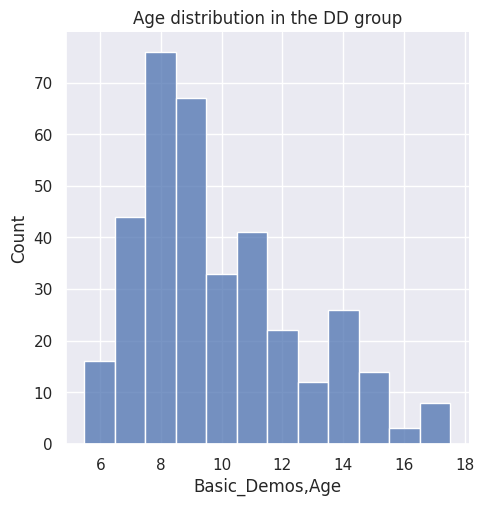

In [ ]:
sns.displot(data_filtered[data_filtered['DD'] == 1]['Basic_Demos,Age'],
             binwidth = 1)
pl.title('Age distribution in the DD group');

In [ ]:
print('Number of DD participants: ', data_filtered[data_filtered['DD'] == 1].shape[0])
print('Number of DD participants younger than 8 y.o.: ', data_filtered[(data_filtered['DD'] == 1) & (data_filtered['Basic_Demos,Age'] < 8)].shape[0])
print('Number of DD participants older than 8 y.o.: ', data_filtered[(data_filtered['DD'] == 1) & (data_filtered['Basic_Demos,Age'] >= 8)].shape[0])

Number of DD participants:  362
Number of DD participants younger than 8 y.o.:  102
Number of DD participants older than 8 y.o.:  260


In [ ]:
# testing the difference between males and females in DD subset younger than 8 y.o.
subset = data_filtered[(data_filtered['DD'] == 1) & (data_filtered['Basic_Demos,Age'] < 7)]
subset_males = subset[subset['Basic_Demos,Sex'] == 0]
subset_females = subset[subset['Basic_Demos,Sex'] == 1]
subset_males_letters = subset_males[subset_males['CTOPP,CTOPP_RL_R'] != '.']
subset_males_digits = subset_males[subset_males['CTOPP,CTOPP_RD_R'] != '.']
subset_females_letters = subset_females[subset_females['CTOPP,CTOPP_RL_R'] != '.']
subset_females_digits = subset_females[subset_females['CTOPP,CTOPP_RD_R'] != '.']

males_letters = subset_males_letters['CTOPP,CTOPP_RL_R'].astype(int).values
males_digits = subset_males_digits['CTOPP,CTOPP_RD_R'].astype(int).values
females_letters = subset_females_letters['CTOPP,CTOPP_RL_R'].astype(int).values
females_digits = subset_females_digits['CTOPP,CTOPP_RD_R'].astype(int).values

In [ ]:
# Perform Welch's t-test
# CTOPP letters
t_stat, p_value = stats.ttest_ind(males_letters, females_letters, equal_var=False)

# Print results
print("Welch's t-test results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret results
if p_value < 0.05:
    print("The difference in scores between males and females is statistically significant.")
else:
    print("There is no statistically significant difference in scores between males and females.")

Welch's t-test results:
T-statistic: -0.9533340039450828
P-value: 0.3491192572870345
There is no statistically significant difference in scores between males and females.


In [ ]:
# Perform Welch's t-test
# CTOPP digits
t_stat, p_value = stats.ttest_ind(males_digits, females_digits, equal_var=False)

# Print results
print("Welch's t-test results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret results
if p_value < 0.05:
    print("The difference in scores between males and females is statistically significant.")
else:
    print("There is no statistically significant difference in scores between males and females.")

Welch's t-test results:
T-statistic: -1.051977476649695
P-value: 0.3072900235825161
There is no statistically significant difference in scores between males and females.


In [ ]:
# testing the difference between males and females in DD subset
subset = data_filtered[data_filtered['DD'] == 1]
subset_males = subset[subset['Basic_Demos,Sex'] == 0]
subset_females = subset[subset['Basic_Demos,Sex'] == 1]
subset_males_letters = subset_males[subset_males['CTOPP,CTOPP_RL_R'] != '.']
subset_males_digits = subset_males[subset_males['CTOPP,CTOPP_RD_R'] != '.']
subset_females_letters = subset_females[subset_females['CTOPP,CTOPP_RL_R'] != '.']
subset_females_digits = subset_females[subset_females['CTOPP,CTOPP_RD_R'] != '.']

males_letters = subset_males_letters['CTOPP,CTOPP_RL_R'].astype(int).values
males_digits = subset_males_digits['CTOPP,CTOPP_RD_R'].astype(int).values
females_letters = subset_females_letters['CTOPP,CTOPP_RL_R'].astype(int).values
females_digits = subset_females_digits['CTOPP,CTOPP_RD_R'].astype(int).values

In [ ]:
# Perform Welch's t-test
# CTOPP letters
t_stat, p_value = stats.ttest_ind(males_letters, females_letters, equal_var=False)

# Print results
print("Welch's t-test results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret results
if p_value < 0.05:
    print("The difference in scores between males and females is statistically significant.")
else:
    print("There is no statistically significant difference in scores between males and females.")


Welch's t-test results:
T-statistic: -0.8760792212277849
P-value: 0.38176295985599185
There is no statistically significant difference in scores between males and females.


In [ ]:
# Perform Welch's t-test
# CTOPP digits
t_stat, p_value = stats.ttest_ind(males_digits, females_digits, equal_var=False)

# Print results
print("Welch's t-test results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret results
if p_value < 0.05:
    print("The difference in scores between males and females is statistically significant.")
else:
    print("There is no statistically significant difference in scores between males and females.")

Welch's t-test results:
T-statistic: -1.4729884161052258
P-value: 0.14220410121734603
There is no statistically significant difference in scores between males and females.


<ipython-input-82-ccf3a593be78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset1['CTOPP,CTOPP_RL_R'] = subset1['CTOPP,CTOPP_RL_R'].astype(int).values


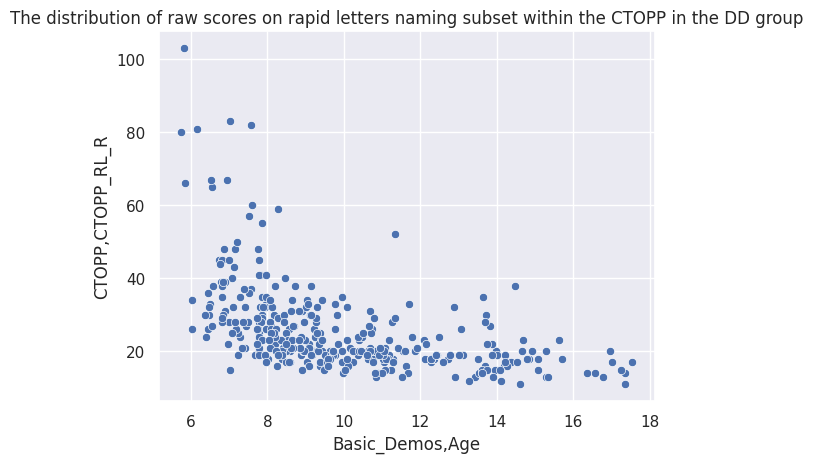

In [ ]:
subset1 = subset[subset['CTOPP,CTOPP_RL_R'] != '.']
subset1['CTOPP,CTOPP_RL_R'] = subset1['CTOPP,CTOPP_RL_R'].astype(int).values
sns.scatterplot(data=subset1,
                x='Basic_Demos,Age',
                y='CTOPP,CTOPP_RL_R');
pl.title('The distribution of raw scores on rapid letters naming subset within the CTOPP in the DD group');

<ipython-input-85-4d2c296c58b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset2['CTOPP,CTOPP_RD_R'] = subset2['CTOPP,CTOPP_RD_R'].astype(int).values


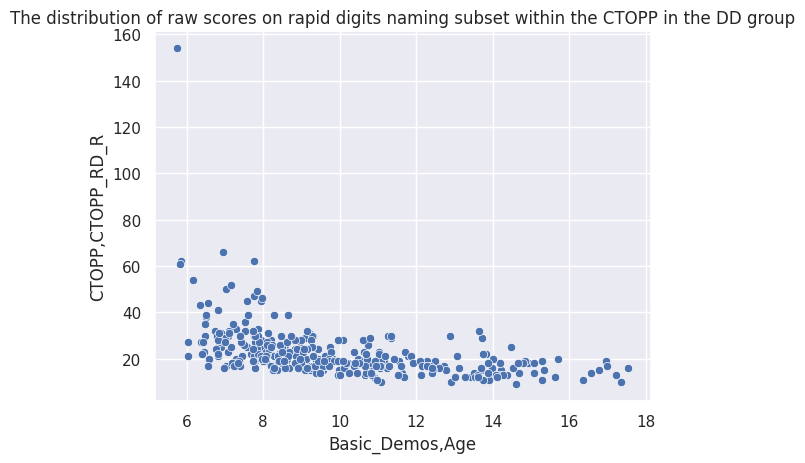

In [ ]:
subset2 = subset[subset['CTOPP,CTOPP_RD_R'] != '.']
subset2['CTOPP,CTOPP_RD_R'] = subset2['CTOPP,CTOPP_RD_R'].astype(int).values
sns.scatterplot(data=subset2,
                x='Basic_Demos,Age',
                y='CTOPP,CTOPP_RD_R');
pl.title('The distribution of raw scores on rapid digits naming subset within the CTOPP in the DD group');

In [ ]:
data_filtered.to_csv(
    Path(working_path).joinpath('data_filtered_done.csv')
)
data_filtered['Identifiers'].to_csv(
    Path(working_path).joinpath('ids.csv')
)